In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf

In [ ]:
msft = yf.Ticker("MSFT")

In [ ]:
# Download data for Microsoft (MSFT) stock
df = yf.download("MSFT", start="2020-01-01", end="2023-09-22")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
df = pd.DataFrame(df)

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,158.779999,160.729996,158.330002,160.619995,155.093689,22622100
2020-01-03,158.320007,159.949997,158.059998,158.619995,153.162491,21116200
2020-01-06,157.080002,159.100006,156.509995,159.029999,153.558380,20813700
2020-01-07,159.320007,159.669998,157.320007,157.580002,152.158279,21634100
2020-01-08,158.929993,160.800003,157.949997,160.089996,154.581924,27746500


In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-15,336.920013,337.399994,329.649994,330.220001,330.220001,37666900
2023-09-18,327.799988,330.399994,326.359985,329.059998,329.059998,16834200
2023-09-19,326.170013,329.390015,324.510010,328.649994,328.649994,16505900
2023-09-20,329.510010,329.589996,320.510010,320.769989,320.769989,21436500
2023-09-21,319.260010,325.350006,315.000000,319.529999,319.529999,35529500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 937 entries, 2020-01-02 to 2023-09-21
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       937 non-null    float64
 1   High       937 non-null    float64
 2   Low        937 non-null    float64
 3   Close      937 non-null    float64
 4   Adj Close  937 non-null    float64
 5   Volume     937 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 51.2 KB


In [ ]:
# Check for missing values
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df.isnull().sum()

Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
50_MA        49
dtype: int64

# Regression Model:

In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,50_MA
Date,,,,,,,
2023-09-15,336.920013,337.399994,329.649994,330.220001,330.220001,37666900,332.272200
2023-09-18,327.799988,330.399994,326.359985,329.059998,329.059998,16834200,332.109000
2023-09-19,326.170013,329.390015,324.510010,328.649994,328.649994,16505900,332.045400
2023-09-20,329.510010,329.589996,320.510010,320.769989,320.769989,21436500,331.811400
2023-09-21,319.260010,325.350006,315.000000,319.529999,319.529999,35529500,331.457999


In [ ]:
# Linear Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = df.drop(columns = ["Close","Adj Close","50_MA"], axis = 1)
y = df["Close"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

accuracy = r2_score(y_test, predictions)
print(f"Accuracy : {accuracy *100}% ")

new_data = np.array([[319.260010, 325.350006, 315.000000, 35529500]])

predicted_price = model.predict(new_data)
print(f"Predicted Price : {predicted_price[0]}","\n")

Mean Squared Error: 2.779417893922792
Accuracy : 99.88598454133158% 
Predicted Price : 320.9656569181792 



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Evaluation and Optimization for Regression Model (Example: Linear Regression)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have already split your data into X_train, X_test, y_train, and y_test

# Initialize the regression model
regression_model = LinearRegression()

# Fit the model to the training data
regression_model.fit(X_train, y_train)

# Make predictions
y_pred = regression_model.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Hyperparameter Tuning using GridSearchCV (Example: Ridge Regression)
from sklearn.linear_model import Ridge

# Define a grid of hyperparameters to search over
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0]}

# Initialize the Ridge regression model
ridge_model = Ridge()

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

# Initialize and train the model with the best hyperparameters
optimized_ridge_model = Ridge(alpha=best_alpha)
optimized_ridge_model.fit(X_train, y_train)

# Make predictions with the optimized model
y_pred_optimized = optimized_ridge_model.predict(X_test)

# Calculate MSE and R-squared for the optimized model
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print(f"Optimized Mean Squared Error (MSE): {mse_optimized}")
print(f"Optimized R-squared (R2): {r2_optimized}")

Mean Squared Error (MSE): 0.2501955137641267
R-squared (R2): -0.0007820550565067474
Optimized Mean Squared Error (MSE): 0.2501899078153906
Optimized R-squared (R2): -0.0007596312615623102


In [ ]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(mse)

accuracy = r2_score(y_test, y_pred)
print(f"Accuracy : {accuracy *100}% ")

new_data = np.array([[319.260010, 325.350006, 315.000000, 35529500]])

predicted_price = rf.predict(new_data)
print(predicted_price[0])

5.856228533392585
Accuracy : 99.75976963242493% 
318.46220153808594


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# Classification Model

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create a target variable for classification (e.g., 1 for price increase, 0 for no change or decrease)
df['Price_Up'] = (df['Close'].shift(-1) > df['Close']).astype(int)

# Prepare features and target variable
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Price_Up']

# Label encoding for the target variablea
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the classification model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Make predictions
predictions = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
print(f"Accuracy: {accuracy * 100} %")
print(f"Classification Report:\n{report}")


Accuracy: 50.0 %
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        94
           1       0.50      1.00      0.67        94

    accuracy                           0.50       188
   macro avg       0.25      0.50      0.33       188
weighted avg       0.25      0.50      0.33       188



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluation and Optimization for Classification Model (Example: Logistic Regression)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Assuming you have already split your data into X_train, X_test, y_train, and y_test

# Initialize the classification model (Logistic Regression)
classification_model = LogisticRegression()

# Fit the model to the training data
classification_model.fit(X_train, y_train)

# Make predictions
y_pred = classification_model.predict(X_test)

# Calculate classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Hyperparameter Tuning using GridSearchCV (Example: Logistic Regression)
param_grid = {'C': [0.01, 0.1, 1.0, 10.0]}

# Initialize the Logistic Regression model
logistic_model = LogisticRegression()

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_C = grid_search.best_params_['C']

# Initialize and train the model with the best hyperparameters
optimized_logistic_model = LogisticRegression(C=best_C)
optimized_logistic_model.fit(X_train, y_train)

# Make predictions with the optimized model
y_pred_optimized = optimized_logistic_model.predict(X_test)

# Calculate classification metrics for the optimized model
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
precision_optimized = precision_score(y_test, y_pred_optimized)
recall_optimized = recall_score(y_test, y_pred_optimized)
f1_optimized = f1_score(y_test, y_pred_optimized)

print(f"Optimized Accuracy: {accuracy_optimized}")
print(f"Optimized Precision: {precision_optimized}")
print(f"Optimized Recall: {recall_optimized}")
print(f"Optimized F1 Score: {f1_optimized}")


Accuracy: 0.5
Precision: 0.5
Recall: 1.0
F1 Score: 0.6666666666666666
Optimized Accuracy: 0.5
Optimized Precision: 0.5
Optimized Recall: 1.0
Optimized F1 Score: 0.6666666666666666


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest classifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

# Make predictions
predictions_rfc = rfc.predict(X_test)

# Evaluate the Random Forest model
accuracy_rfc = accuracy_score(y_test, predictions_rfc)
report_rfc = classification_report(y_test, predictions_rfc)
print("Random Forest Classifier:")
print(f"Accuracy: {accuracy_rfc * 100} %")
print(f"Classification Report:\n{report_rfc}")


Random Forest Classifier:
Accuracy: 54.78723404255319 %
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.56      0.55        94
           1       0.55      0.53      0.54        94

    accuracy                           0.55       188
   macro avg       0.55      0.55      0.55       188
weighted avg       0.55      0.55      0.55       188



In [ ]:
# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best estimator (SVM model with the best hyperparameters)
best_svm = grid_search.best_estimator_

# Get the best cross-validation score (mean accuracy)
best_score = grid_search.best_score_

# Get detailed results of the grid search
grid_results = grid_search.cv_results_

# Print the best hyperparameters and score
print("Best Hyperparameters:", best_params)
print("Best Mean Cross-Validation Score:", best_score)

# Optionally, you can also print the detailed results of the grid search
# This will show you the performance for each combination of hyperparameters
print("Grid Search Results:")
for mean_score, params in zip(grid_results['mean_test_score'], grid_results['params']):
    print(f"Mean Score: {mean_score:.4f}, Params: {params}")


Best Hyperparameters: {'C': 1, 'kernel': 'rbf'}
Best Mean Cross-Validation Score: 0.52868903803132
Grid Search Results:
Mean Score: 0.5073, Params: {'C': 0.1, 'kernel': 'linear'}
Mean Score: 0.5247, Params: {'C': 0.1, 'kernel': 'rbf'}
Mean Score: 0.5073, Params: {'C': 1, 'kernel': 'linear'}
Mean Score: 0.5287, Params: {'C': 1, 'kernel': 'rbf'}
Mean Score: 0.5087, Params: {'C': 10, 'kernel': 'linear'}
Mean Score: 0.5220, Params: {'C': 10, 'kernel': 'rbf'}


In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize and train the SVM classifier with scaled features

from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)

# Make predictions with scaled test data
predictions = svm.predict(X_test_scaled)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, predictions)
report_svm = classification_report(y_test, predictions)
print("Support Vector Machine (SVM) Classifier:")
print(f"Accuracy: {accuracy_svm * 100} %")
print(f"Classification Report:\n{report_svm}")

Support Vector Machine (SVM) Classifier:
Accuracy: 54.25531914893617 %
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.39      0.46        94
           1       0.53      0.69      0.60        94

    accuracy                           0.54       188
   macro avg       0.55      0.54      0.53       188
weighted avg       0.55      0.54      0.53       188



# Time Series

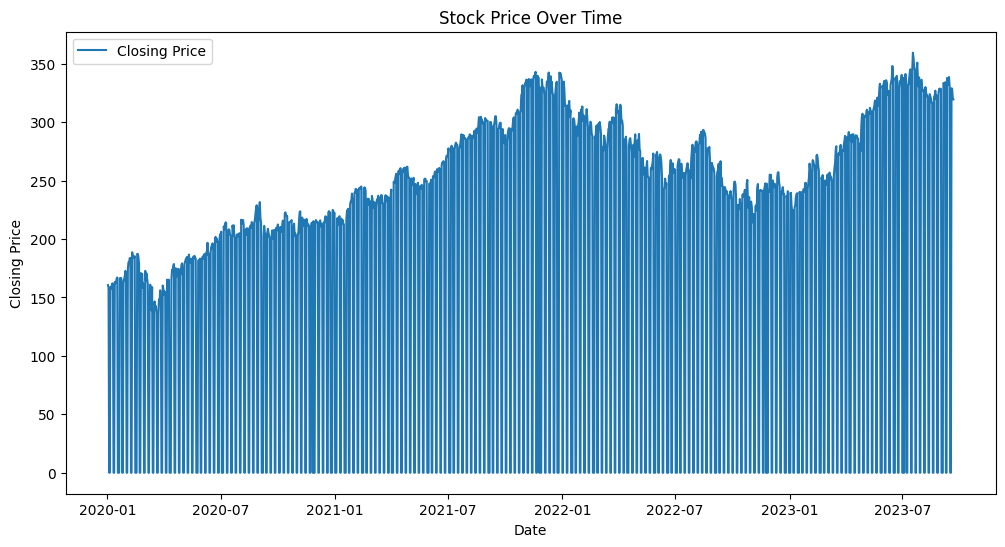

ADF Statistic: -2.1004461639563488 

p-value: 0.24433523458259804 

Critical Values: {'1%': -3.435246778744666, '5%': -2.863702546181002, '10%': -2.5679213448446134} 

weak evidence against null hypothesis,indicating it is non-stationary 


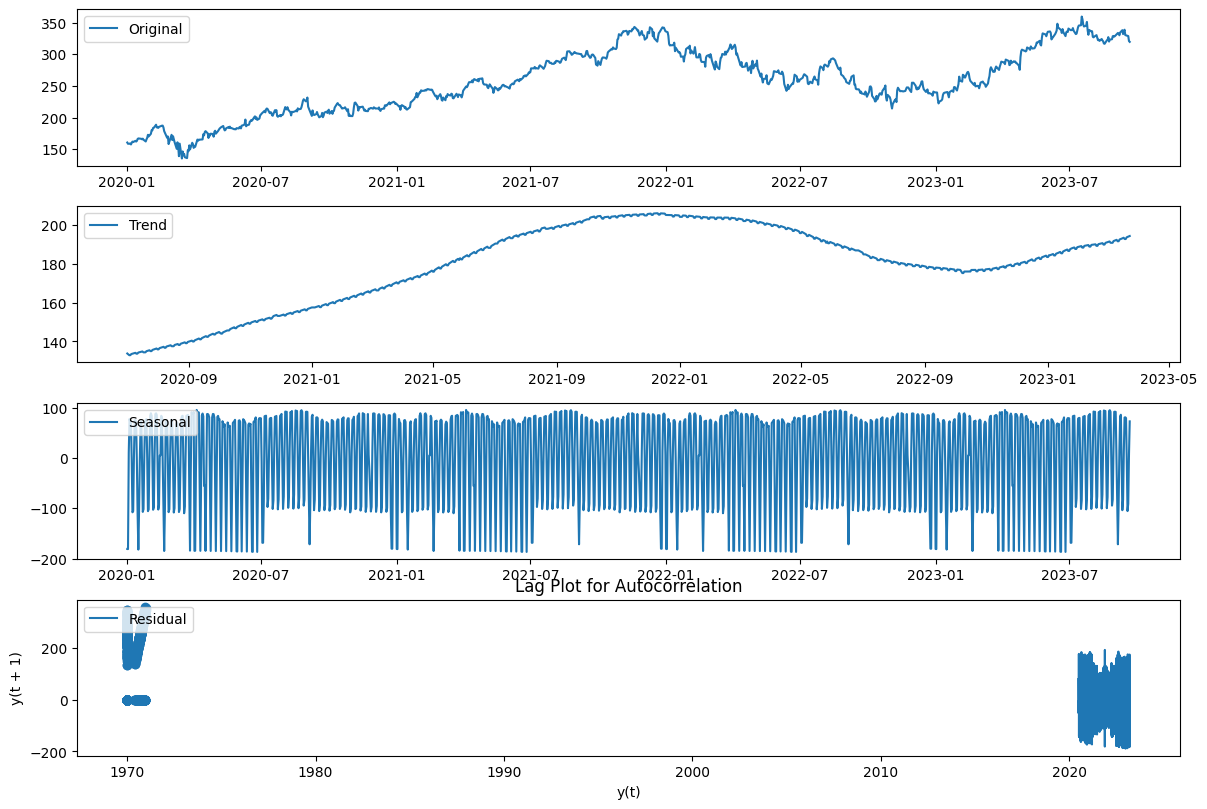

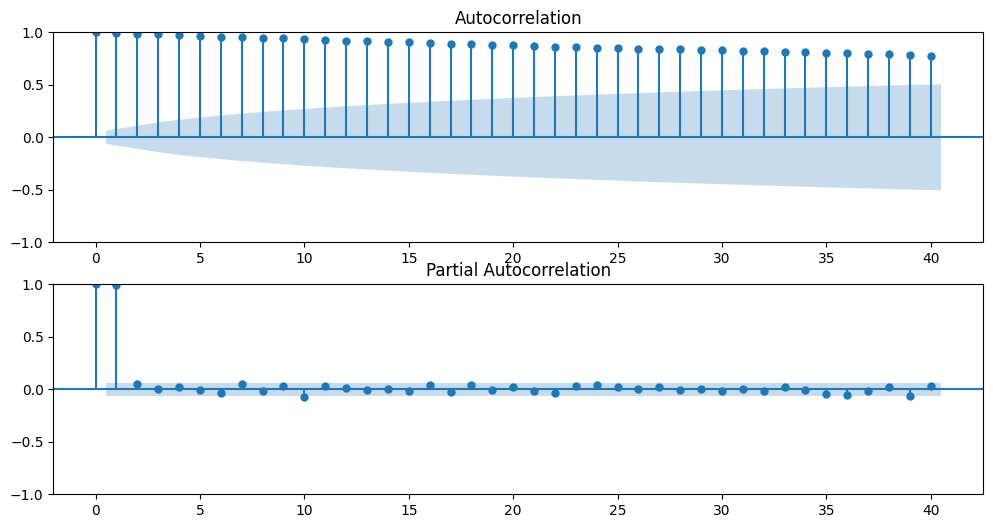

In [ ]:

import matplotlib.pyplot as plt
import statsmodels.api as sm

y = df['Close'].resample('D').sum()

# Plot the closing price over time
plt.figure(figsize=(12, 6))
plt.plot(y, label='Closing Price')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# Decompose the time series to analyze trend, seasonality, and residuals
decomposition = sm.tsa.seasonal_decompose(y, model='additive', period = 365)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['Close'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()

# Perform Augmented Dickey-Fuller test to check for stationarity
from statsmodels.tsa.stattools import adfuller
result = adfuller(y)
print("ADF Statistic:", result[0],"\n")
print("p-value:", result[1],"\n")
print("Critical Values:", result[4],"\n")

if result[1] <= 0.05:
    print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary","\n")
else:
    print("weak evidence against null hypothesis,indicating it is non-stationary ")

# Create a lag plot to visualize autocorrelation
from pandas.plotting import lag_plot

lag_plot(y)
plt.title('Lag Plot for Autocorrelation')
plt.show()

# Perform autocorrelation and partial autocorrelation analysis
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(df['Close'], lags=40, ax=plt.gca())
plt.subplot(212)
plot_pacf(df['Close'], lags=40, ax=plt.gca())
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

p = 1  # AutoRegressive (AR) order
d = 0  # Integration (I) order (differencing)
q = 1  # Moving Average (MA) order

model = ARIMA(y, order=(p, d, q))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1359
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -8304.038
Date:                Fri, 22 Sep 2023   AIC                          16616.075
Time:                        14:43:03   BIC                          16636.933
Sample:                    01-02-2020   HQIC                         16623.884
                         - 09-21-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        176.6378      5.657     31.222      0.000     165.549     187.726
ar.L1         -0.0670      0.062     -1.081      0.280      -0.189       0.054
ma.L1          0.6393      0.032     19.722      0.0

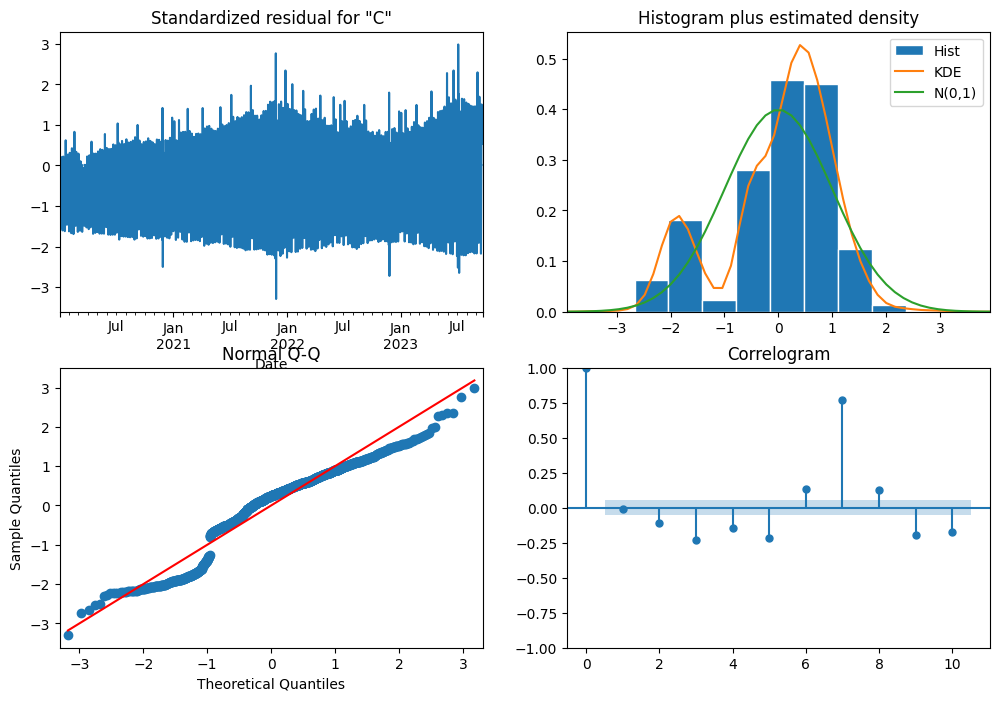

In [ ]:
model_fit.plot_diagnostics(figsize=(12, 8))
plt.show()

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,50_MA,Price_Up,Price_Trend
Date,,,,,,,,,
2020-01-02,158.779999,160.729996,158.330002,160.619995,155.093689,22622100,NaN,0,price_stable
2020-01-03,158.320007,159.949997,158.059998,158.619995,153.162476,21116200,NaN,1,price_down
2020-01-06,157.080002,159.100006,156.509995,159.029999,153.558395,20813700,NaN,0,price_up
2020-01-07,159.320007,159.669998,157.320007,157.580002,152.158279,21634100,NaN,1,price_down
2020-01-08,158.929993,160.800003,157.949997,160.089996,154.581909,27746500,NaN,1,price_up


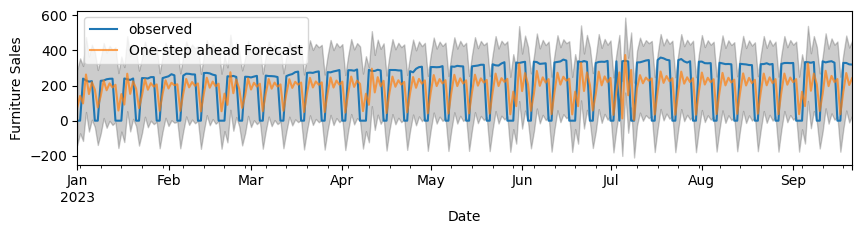

In [ ]:
# will plot the actual values with respect to the forecast values for the next 1 year.

pred = model_fit.get_prediction(start=pd.to_datetime('2023-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2023':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(10, 2))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [ ]:
# Mean Square Error
y_forecasted = pred.predicted_mean
y_truth = y['2023-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 16022.81


In [ ]:
# RMSE
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 126.58


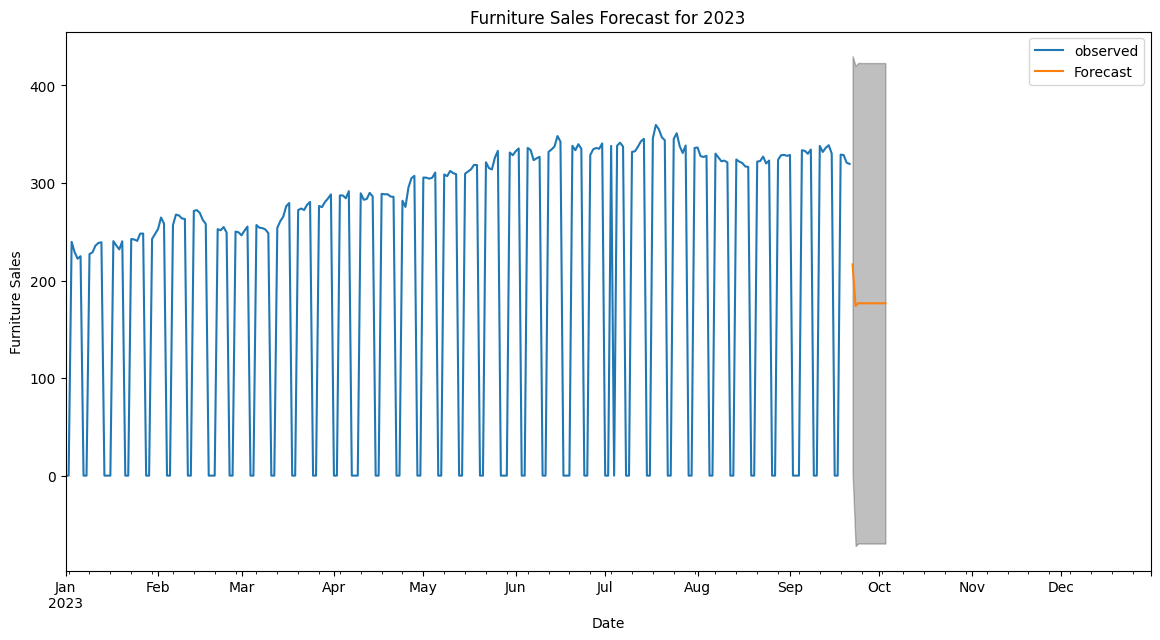

In [ ]:
# Assuming your time series index is in DateTime format and the frequency is set correctly
# Calculate the number of steps required to cover the year 2023

# Get the forecast for 2023 and beyond
pred_uc = model_fit.get_forecast(steps = 12)

# Plot the forecast for 2023 and beyond
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.xlim('2023-01-01', '2023-12-31')  # Set the x-axis limits for 2023
plt.legend()
plt.title('Furniture Sales Forecast for 2023')
plt.show()


In [ ]:
# Assuming your time series index is in DateTime format and the frequency is set correctly
# Calculate the number of steps required to cover the year 2023
steps_for_2023 = 12  # Assuming monthly data, set to 1 for daily data

# Get the forecast for 2023 and beyond
pred_uc = model_fit.get_forecast(steps=steps_for_2023)

# Extract and print the forecasted values for 2023
forecasted_values = pred_uc.predicted_mean['2023-01-01':'2023-12-31']  # Adjust date range as needed
print("Forecasted Values for 2023:")
print(forecasted_values)


Forecasted Values for 2023:
2023-09-22    216.491913
2023-09-23    173.966614
2023-09-24    176.816812
2023-09-25    176.625782
2023-09-26    176.638585
2023-09-27    176.637727
2023-09-28    176.637785
2023-09-29    176.637781
2023-09-30    176.637781
2023-10-01    176.637781
2023-10-02    176.637781
2023-10-03    176.637781
Freq: D, Name: predicted_mean, dtype: float64
